In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

In [2]:
location = pvlib.location.Location(-27.430891, -48.441406, tz = 'Brazil/East',altitude= 2.74, name = 'Florianopolis')  ## check for daylight savings 'Etc/GMT-3' 'America/Sao_Paulo'


In [3]:
naive_times = pd.date_range(start='2017-12-17 14:32:40', end='2017-12-20 14:25:08', freq='1s', tz = location.tz)

In [4]:
naive_times 

DatetimeIndex(['2017-12-17 14:32:40-02:00', '2017-12-17 14:32:41-02:00',
               '2017-12-17 14:32:42-02:00', '2017-12-17 14:32:43-02:00',
               '2017-12-17 14:32:44-02:00', '2017-12-17 14:32:45-02:00',
               '2017-12-17 14:32:46-02:00', '2017-12-17 14:32:47-02:00',
               '2017-12-17 14:32:48-02:00', '2017-12-17 14:32:49-02:00',
               ...
               '2017-12-20 14:24:59-02:00', '2017-12-20 14:25:00-02:00',
               '2017-12-20 14:25:01-02:00', '2017-12-20 14:25:02-02:00',
               '2017-12-20 14:25:03-02:00', '2017-12-20 14:25:04-02:00',
               '2017-12-20 14:25:05-02:00', '2017-12-20 14:25:06-02:00',
               '2017-12-20 14:25:07-02:00', '2017-12-20 14:25:08-02:00'],
              dtype='datetime64[ns, Brazil/East]', length=258749, freq='S')

In [5]:
naive_times = pd.DatetimeIndex(naive_times)

In [6]:
naive_times.shape

(258749,)

In [8]:
naive_times = pd.DatetimeIndex(naive_times)

In [7]:
eth = pvlib.irradiance.get_extra_radiation(naive_times, solar_constant = 1366.1, method = 'nrel').to_frame()

<AxesSubplot:>

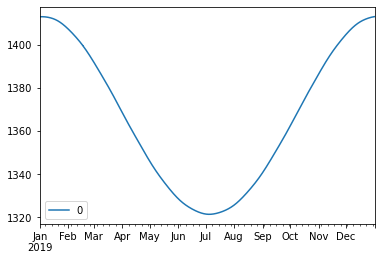

In [30]:
eth.loc['2019'].plot()

<AxesSubplot:>

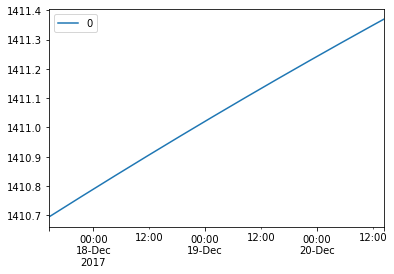

In [8]:
eth.plot()

In [9]:
solpos = pvlib.solarposition.get_solarposition(naive_times, location.latitude, location.longitude, location.altitude, pressure = 101293, temperature = 25)


In [10]:
solpos

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2017-12-17 14:32:40-02:00,19.061608,19.067161,70.938392,70.932839,277.671845,3.706776
2017-12-17 14:32:41-02:00,19.065271,19.070825,70.934729,70.929175,277.668498,3.706770
2017-12-17 14:32:42-02:00,19.068933,19.074489,70.931067,70.925511,277.665152,3.706765
2017-12-17 14:32:43-02:00,19.072596,19.078153,70.927404,70.921847,277.661806,3.706759
2017-12-17 14:32:44-02:00,19.076259,19.081817,70.923741,70.918183,277.658461,3.706753
...,...,...,...,...,...,...
2017-12-20 14:25:04-02:00,17.051994,17.056921,72.948006,72.943079,279.457180,2.223903
2017-12-20 14:25:05-02:00,17.055640,17.060568,72.944360,72.939432,279.453282,2.223897
2017-12-20 14:25:06-02:00,17.059286,17.064215,72.940714,72.935785,279.449385,2.223891
2017-12-20 14:25:07-02:00,17.062932,17.067862,72.937068,72.932138,279.445488,2.223886


In [11]:
eth

,0
2017-12-17 14:32:40-02:00,1410.694623
2017-12-17 14:32:41-02:00,1410.694626
2017-12-17 14:32:42-02:00,1410.694629
2017-12-17 14:32:43-02:00,1410.694632
2017-12-17 14:32:44-02:00,1410.694635
...,...
2017-12-20 14:25:04-02:00,1411.370028
2017-12-20 14:25:05-02:00,1411.370031
2017-12-20 14:25:06-02:00,1411.370033
2017-12-20 14:25:07-02:00,1411.370036


In [12]:
cosSZA = np.cos(np.deg2rad(solpos.azimuth))
PPmin = -4


In [13]:
cosSZA

2017-12-17 14:32:40-02:00    0.133499
2017-12-17 14:32:41-02:00    0.133441
2017-12-17 14:32:42-02:00    0.133383
2017-12-17 14:32:43-02:00    0.133326
2017-12-17 14:32:44-02:00    0.133268
                               ...   
2017-12-20 14:25:04-02:00    0.164310
2017-12-20 14:25:05-02:00    0.164243
2017-12-20 14:25:06-02:00    0.164176
2017-12-20 14:25:07-02:00    0.164109
2017-12-20 14:25:08-02:00    0.164042
Freq: S, Name: azimuth, Length: 258749, dtype: float64

In [14]:
PPmin

-4

In [ ]:
GHIPPmax = eth*1.5*cosSZA**(1.2) + 100

In [60]:
DIFPPmax = eth*0.95*cosSZA**(1.2) + 50
DNIPPmax = eth
ERmin = -2
GHIERmax = eth*1.2*cosSZA**(1.2) + 50
DIFERmax = eth*0.75*cosSZA**(1.2)+ 30
DNIERmax = eth*0.95*cosSZA**(0.2)+10

In [74]:
y1 = GHIPPmax.loc['2018-10-15']

In [78]:
y2 = GHIERmax.loc['2018-10-15']

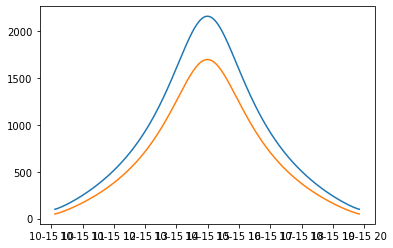

In [79]:
plt.plot(y1)
plt.plot(y2)

In [80]:
GHIPPmax

2018-01-17 14:58:28-02:00    431.445050
2018-01-17 14:58:29-02:00    431.323923
2018-01-17 14:58:30-02:00    431.202827
2018-01-17 14:58:31-02:00    431.081770
2018-01-17 14:58:32-02:00    430.960747
                                ...    
2021-01-21 14:25:04-03:00    333.671023
2021-01-21 14:25:05-03:00    333.580050
2021-01-21 14:25:06-03:00    333.489101
2021-01-21 14:25:07-03:00    333.398174
2021-01-21 14:25:08-03:00    333.307267
Freq: S, Length: 95041601, dtype: float64

In [85]:
GHIPPmax['min']=PPmin

KeyboardInterrupt: 

In [ ]:
GHIPPmax

KeyboardInterrupt: 

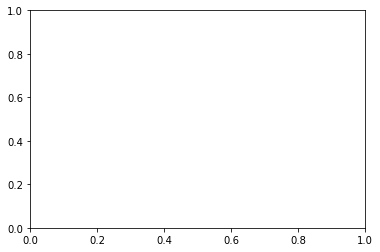

In [63]:
DNIPPmax.plot()

In [ ]:
DNIERmax.plot()

In [ ]:
DIFPPmax.plot()

In [ ]:
DIFERmax.plot()

In [42]:
extraterrestrial = eth.merge(solpos, left_on='data', right_on='data', how='inner')


In [43]:
extraterrestrial

,0,data,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
0,1411.315013,2018-01-17 14:58:28-02:00,22.576776,22.583463,67.423224,67.416537,282.313586,-10.149740
1,1411.315010,2018-01-17 14:58:29-02:00,22.580388,22.587077,67.419612,67.412923,282.309777,-10.149744
2,1411.315008,2018-01-17 14:58:30-02:00,22.584001,22.590690,67.415999,67.409310,282.305969,-10.149748
3,1411.315006,2018-01-17 14:58:31-02:00,22.587613,22.594304,67.412387,67.405696,282.302162,-10.149751
4,1411.315003,2018-01-17 14:58:32-02:00,22.591225,22.597917,67.408775,67.402083,282.298356,-10.149755
...,...,...,...,...,...,...,...,...
95041596,1410.549978,2021-01-21 14:25:04-03:00,28.433427,28.442141,61.566573,61.557859,279.174542,-11.429835
95041597,1410.549975,2021-01-21 14:25:05-03:00,28.437077,28.445792,61.562923,61.554208,279.171540,-11.429839
95041598,1410.549972,2021-01-21 14:25:06-03:00,28.440727,28.449443,61.559273,61.550557,279.168538,-11.429842
95041599,1410.549969,2021-01-21 14:25:07-03:00,28.444377,28.453095,61.555623,61.546905,279.165537,-11.429845


In [53]:
eth.dtypes

0                           float64
data    datetime64[ns, Brazil/East]
dtype: object

In [58]:
eth.shape

(95041601,)

In [44]:
    extraterrestrial['ext'] = extraterrestrial[0]


In [45]:
extraterrestrial

,0,data,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time,ext
0,1411.315013,2018-01-17 14:58:28-02:00,22.576776,22.583463,67.423224,67.416537,282.313586,-10.149740,1411.315013
1,1411.315010,2018-01-17 14:58:29-02:00,22.580388,22.587077,67.419612,67.412923,282.309777,-10.149744,1411.315010
2,1411.315008,2018-01-17 14:58:30-02:00,22.584001,22.590690,67.415999,67.409310,282.305969,-10.149748,1411.315008
3,1411.315006,2018-01-17 14:58:31-02:00,22.587613,22.594304,67.412387,67.405696,282.302162,-10.149751,1411.315006
4,1411.315003,2018-01-17 14:58:32-02:00,22.591225,22.597917,67.408775,67.402083,282.298356,-10.149755,1411.315003
...,...,...,...,...,...,...,...,...,...
95041596,1410.549978,2021-01-21 14:25:04-03:00,28.433427,28.442141,61.566573,61.557859,279.174542,-11.429835,1410.549978
95041597,1410.549975,2021-01-21 14:25:05-03:00,28.437077,28.445792,61.562923,61.554208,279.171540,-11.429839,1410.549975
95041598,1410.549972,2021-01-21 14:25:06-03:00,28.440727,28.449443,61.559273,61.550557,279.168538,-11.429842,1410.549972
95041599,1410.549969,2021-01-21 14:25:07-03:00,28.444377,28.453095,61.555623,61.546905,279.165537,-11.429845,1410.549969


In [1]:
## pvlib crash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

location = pvlib.location.Location(-27.430891, -48.441406, tz = 'Brazil/East',altitude= 2.74, name = 'Florianopolis')  ## check for daylight savings 'Etc/GMT-3' 'America/Sao_Paulo'
naive_times = pd.date_range(start='2017-12-17 14:32:40', end='2017-12-20 14:25:08', freq='1s', tz = location.tz)
naive_times = pd.DatetimeIndex(naive_times)
eth = pvlib.irradiance.get_extra_radiation(naive_times, solar_constant = 1366.1, method = 'nrel').to_frame()
solpos = pvlib.solarposition.get_solarposition(naive_times, location.latitude, location.longitude, location.altitude, pressure = 101293, temperature = 25)
cosSZA = np.cos(np.deg2rad(solpos.azimuth))
PPmin = -4

In [2]:
eth.shape

(258749, 1)

In [3]:
cosSZA.shape

(258749,)

In [4]:
eth

,0
2017-12-17 14:32:40-02:00,1410.694623
2017-12-17 14:32:41-02:00,1410.694626
2017-12-17 14:32:42-02:00,1410.694629
2017-12-17 14:32:43-02:00,1410.694632
2017-12-17 14:32:44-02:00,1410.694635
...,...
2017-12-20 14:25:04-02:00,1411.370028
2017-12-20 14:25:05-02:00,1411.370031
2017-12-20 14:25:06-02:00,1411.370033
2017-12-20 14:25:07-02:00,1411.370036


In [5]:
cosSZA

2017-12-17 14:32:40-02:00    0.133499
2017-12-17 14:32:41-02:00    0.133441
2017-12-17 14:32:42-02:00    0.133383
2017-12-17 14:32:43-02:00    0.133326
2017-12-17 14:32:44-02:00    0.133268
                               ...   
2017-12-20 14:25:04-02:00    0.164310
2017-12-20 14:25:05-02:00    0.164243
2017-12-20 14:25:06-02:00    0.164176
2017-12-20 14:25:07-02:00    0.164109
2017-12-20 14:25:08-02:00    0.164042
Freq: S, Name: azimuth, Length: 258749, dtype: float64

In [5]:
x = x + 100

In [10]:
x.shape

(258749,)

In [12]:
ghiPP['max'] - x[0]

2017-12-17 14:32:40-02:00    5.684342e-14
2017-12-17 14:32:41-02:00    3.738232e-07
2017-12-17 14:32:42-02:00    7.476457e-07
2017-12-17 14:32:43-02:00    1.121468e-06
2017-12-17 14:32:44-02:00    1.495291e-06
                                 ...     
2017-12-20 14:25:04-02:00    9.041280e-02
2017-12-20 14:25:05-02:00    9.041312e-02
2017-12-20 14:25:06-02:00    9.041345e-02
2017-12-20 14:25:07-02:00    9.041377e-02
2017-12-20 14:25:08-02:00    9.041410e-02
Freq: S, Name: max, Length: 258749, dtype: float64

In [13]:
ghiPP['min']= PPmin

In [7]:
ghiPP = pd.DataFrame(columns = ['max','min'])
ghiPP['max'] = eth[0]*1.5*cosSZA[0]**(1.2) + 100

In [14]:
ghiPP

,max,min
2017-12-17 14:32:40-02:00,288.842050,-4
2017-12-17 14:32:41-02:00,288.842050,-4
2017-12-17 14:32:42-02:00,288.842051,-4
2017-12-17 14:32:43-02:00,288.842051,-4
2017-12-17 14:32:44-02:00,288.842052,-4
...,...,...
2017-12-20 14:25:04-02:00,288.932463,-4
2017-12-20 14:25:05-02:00,288.932463,-4
2017-12-20 14:25:06-02:00,288.932464,-4
2017-12-20 14:25:07-02:00,288.932464,-4


In [16]:
ghiPP.index

DatetimeIndex(['2017-12-17 14:32:40-02:00', '2017-12-17 14:32:41-02:00',
               '2017-12-17 14:32:42-02:00', '2017-12-17 14:32:43-02:00',
               '2017-12-17 14:32:44-02:00', '2017-12-17 14:32:45-02:00',
               '2017-12-17 14:32:46-02:00', '2017-12-17 14:32:47-02:00',
               '2017-12-17 14:32:48-02:00', '2017-12-17 14:32:49-02:00',
               ...
               '2017-12-20 14:24:59-02:00', '2017-12-20 14:25:00-02:00',
               '2017-12-20 14:25:01-02:00', '2017-12-20 14:25:02-02:00',
               '2017-12-20 14:25:03-02:00', '2017-12-20 14:25:04-02:00',
               '2017-12-20 14:25:05-02:00', '2017-12-20 14:25:06-02:00',
               '2017-12-20 14:25:07-02:00', '2017-12-20 14:25:08-02:00'],
              dtype='datetime64[ns, Brazil/East]', length=258749, freq='S')